In [82]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skew
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('../Estadística/stroke_brain_data.csv')
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1


In [84]:
datos_age = np.round(np.array(df['age']), decimals=2, out=None)
datos_age

array([61.  , 59.  , 78.  , 57.  , 58.  , 59.  , 63.  , 75.  , 76.  ,
       78.  , 63.  , 78.  , 75.  , 76.  , 51.  , 66.  , 58.  , 58.  ,
       76.  , 72.  , 78.  , 75.  , 38.  , 65.  , 79.  , 76.  , 71.  ,
        1.32, 79.  , 64.  , 79.  , 78.  , 80.  , 77.  , 61.  , 79.  ,
       74.  , 76.  , 74.  , 71.  , 34.  , 76.  , 63.  , 61.  , 54.  ,
       40.  , 48.  , 61.  , 31.  , 43.  ,  9.  , 52.  , 77.  , 17.  ,
       71.  , 35.  , 23.  , 40.  , 23.  , 71.  , 13.  , 73.  ,  3.  ,
       51.  , 35.  , 73.  ,  6.  , 46.  , 71.  , 54.  , 80.  , 49.  ,
       72.  , 25.  , 27.  , 51.  , 48.  ,  7.  , 61.  , 25.  , 30.  ,
       71.  , 47.  , 76.  , 29.  , 48.  , 57.  , 58.  , 45.  , 66.  ,
       59.  , 34.  , 69.  , 66.  , 48.  , 32.  , 60.  , 30.  , 60.  ,
       10.  , 20.  , 77.  , 67.  , 42.  , 60.  ,  0.48, 35.  , 50.  ,
       19.  , 77.  , 67.  , 20.  , 49.  , 77.  , 52.  , 43.  , 69.  ,
       34.  , 78.  , 76.  , 62.  , 71.  , 79.  , 79.  , 54.  , 73.  ,
        5.  , 38.  ,

In [85]:
datos_bmi = np.round(np.array(df['bmi']), decimals=2, out=None)
datos_bmi

array([31.56, 30.24, 30.7 , 33.81, 31.38, 33.48, 30.04, 28.32, 28.4 ,
       29.14, 31.6 , 29.32, 28.32, 27.95, 30.49, 29.29, 30.  , 30.2 ,
       28.2 , 32.12, 29.21, 28.07, 29.86, 29.58, 27.97, 27.94, 28.95,
       18.72, 29.14, 29.79, 28.76, 27.09, 27.28, 28.08, 32.95, 27.24,
       28.74, 31.68, 28.07, 30.76, 29.7 , 33.08, 29.97, 30.86, 33.74,
       30.07, 31.7 , 30.  , 31.2 , 29.85, 20.02, 33.12, 28.98, 26.42,
       29.02, 29.79, 27.  , 30.07, 28.38, 30.38, 22.56, 30.2 , 18.9 ,
       33.75, 29.61, 28.6 , 20.51, 31.61, 32.27, 31.9 , 27.41, 29.88,
       28.55, 27.17, 28.9 , 32.29, 33.7 , 19.48, 33.75, 27.24, 29.28,
       30.72, 32.06, 28.33, 28.62, 30.01, 35.19, 30.27, 30.01, 30.54,
       31.38, 29.9 , 30.62, 29.19, 33.17, 29.75, 31.38, 29.28, 32.13,
       20.26, 26.31, 28.  , 29.08, 32.5 , 31.9 , 17.9 , 29.83, 31.98,
       26.28, 29.66, 28.94, 26.59, 30.19, 27.96, 31.79, 29.98, 30.57,
       31.48, 28.02, 28.03, 32.44, 30.56, 30.5 , 27.41, 30.16, 33.9 ,
       19.03, 33.54,

In [86]:
#Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. 
#El objetivo de este pair programming es:

In [87]:
#Hacer una exploración inicial del dataframe.
    #¿Cuántas filas tiene?
    #¿Cuántas nulos tiene?
    #¿Y duplicados?
    #¿Qué tipo de datos tenemos en el dataframe?
    #etc.

print('Size: ',df.shape)
print('---------------------------')
print('Nulos: ',df.isnull())
print('---------------------------')
print('Columnas: ',df.columns)
print('---------------------------')
print('Col. Categóricas: ',df.info())
print('---------------------------')
print('Col. Numéricas: ',df.describe())
print('---------------------------')
print('Index: ',df.index)
print('---------------------------')
print('Duplicados: ',df.duplicated().sum())



Size:  (201, 11)
---------------------------
Nulos:       gender    age  hypertension  heart_disease  ever_married  work_type  \
0     False  False         False          False         False      False   
1     False  False         False          False         False      False   
2     False  False         False          False         False      False   
3     False  False         False          False         False      False   
4     False  False         False          False         False      False   
..      ...    ...           ...            ...           ...        ...   
196   False  False         False          False         False      False   
197   False  False         False          False         False      False   
198   False  False         False          False         False      False   
199   False  False         False          False         False      False   
200   False  False         False          False         False      False   

     Residence_type  avg_glucose_l

In [88]:
#Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.
#Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

    #- ¿Cuál es el valor más típico con respecto al IMC para un infarto cerebral?

moda,frecuencia=stats.mode(datos_bmi)
print('El valor más típico de IMC para sufrir un infarto cerebral: ',moda)
print('La frecuencia con la que aparece ese valor: ',frecuencia)


El valor más típico de IMC para sufrir un infarto cerebral:  [26.53]
La frecuencia con la que aparece ese valor:  [3]


In [89]:
    #- ¿Cuál es la media de edad para in infarto cerebral?

print('La media de edad para sufrir un infarto cerebral es de',datos_age.mean(),'años')

La media de edad para sufrir un infarto cerebral es de 52.04915422885573 años


In [90]:
    #- ¿Cuál es el mínimo de edad? ¿Y la máxima? 

print('La mínima edad para sufrir un infarto cerebral es de',datos_age.min(),'años')
print('La máxima edad para sufrir un infarto cerebral es de',datos_age.max(),'años')

La mínima edad para sufrir un infarto cerebral es de 0.48 años
La máxima edad para sufrir un infarto cerebral es de 82.0 años


In [91]:
    #- Cuál es la varianza y la desviación típica de nuestros datos?

print('La vaianza del cunjunto de datos es: ',np.var(datos_age))
print('Según este resultado, podemos afirmar que los datos son heterogéneos con respecto a la edad para sufrir un infarto cerebral.')

La vaianza del cunjunto de datos es:  493.7594545085518
Según este resultado, podemos afirmar que los datos son heterogéneos con respecto a la edad para sufrir un infarto cerebral.


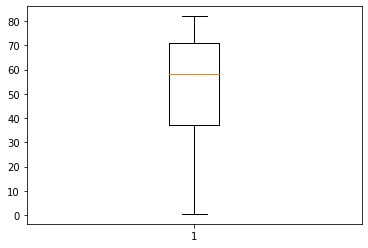

Según el diagrama de caja, no se muestran outliers, aunque el rango de datos es muy amplio, por lo que los datos no son homogéneos. La masa de datos se centra entre los 40 y los 70 años.


In [92]:
    #- ¿Tenemos outliers en nuestros datos con respecto a la edad?

plt.figure()
plt.boxplot(datos_age)
plt.show()

print('Según el diagrama de caja, no se muestran outliers, aunque el rango de datos es muy amplio, por lo que los datos no son homogéneos. La masa de datos se centra entre los 40 y los 70 años.')

Según el coeficiente de correlación de Pearson, la edad y el IMC están positivamente relacionados. Podemos observarlo en el siguiente mapa de calor:


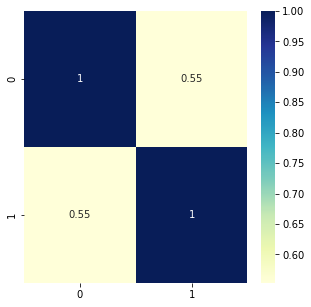

In [93]:
    #- ¿Hay correlación entre la edad y el IMC para un infarto cerebral?

corr=np.corrcoef(datos_age,datos_bmi)

print('Según el coeficiente de correlación de Pearson, la edad y el IMC están positivamente relacionados. Podemos observarlo en el siguiente mapa de calor:')

plt.figure(figsize = (5,5))
sns.heatmap(corr,
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

Podemos observar, con el siguiente mapa de calor, las diferentes correlaciones entre todos los datos de nuestro dataset.


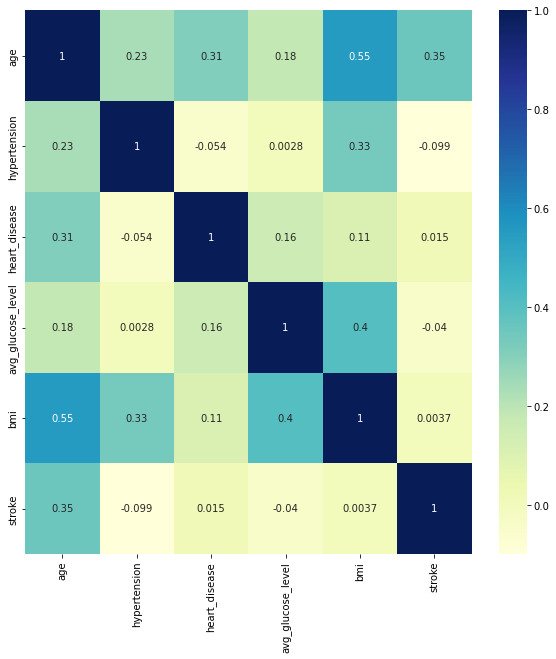

In [94]:
corr1=df.corr()

print('Podemos observar, con el siguiente mapa de calor, las diferentes correlaciones entre todos los datos de nuestro dataset.')

plt.figure(figsize = (10,10))
sns.heatmap(corr1,
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

Este es el valor de infartos cerebrales teniendo en cuenta la edad y la hipertensión de los pacientes: hypertension  0  1
age               
0.48          1  0
1.08          1  0
1.32          2  0
1.80          1  0
1.88          1  0
...          .. ..
77.00         4  1
78.00         5  4
79.00         5  3
80.00         2  1
82.00         0  1

[73 rows x 2 columns]
Podemos observarlo mejor con el siguiente gráfico:


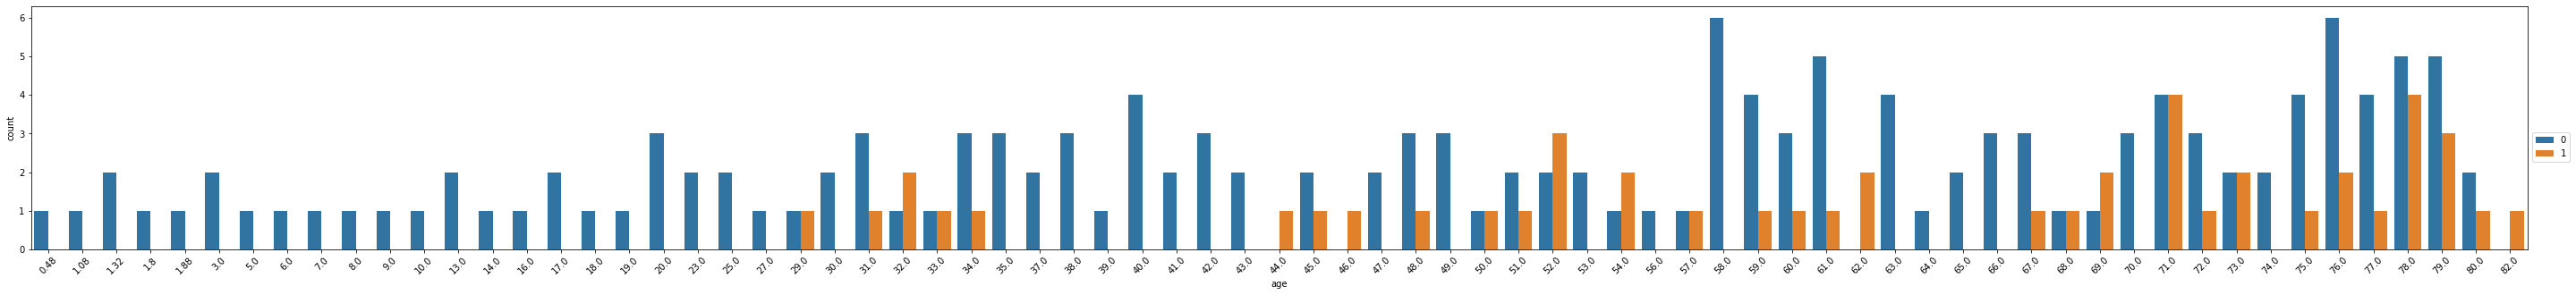

In [105]:
    #- ¿Cuál es el valor de infartos cerebrales teniendo en cuenta la edad y la hipertensión?

crosstab = pd.crosstab( df['age'],df['hypertension'])
print('Este es el valor de infartos cerebrales teniendo en cuenta la edad y la hipertensión de los pacientes:',crosstab)
print('Podemos observarlo mejor con el siguiente gráfico:')

plt.figure(figsize = (50,5))  # establecemos el tamaño de la gráfica
sns.countplot(data = df,x = "age", hue = "hypertension") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.